![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 3: Handling Large Data with NumPy

### Contents:

* [Numpy](#Numpy)
* [Broadcasting](#Broadcasting)
* [Manipulating Arrays](#Manipulating Arrays)
* [Linear Algebra](#Linear Algebra)
* [Data Processing](#Data Processing)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np?

# Numpy

Datasets can include collections of documents, images, sound clips, numerical measurements, or, really anything. Despite the heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

| Data type	    | Arrays of Numbers? |
|---------------|-------------|
|Images | Pixel brightness across different channels|
|Videos | Pixels brightness across different channels for each frame | 
|Sound | Intensity over time |
|Numbers | No need for transformation | 
|Tables | Mapping from strings to numbers |


Therefore, the efficient storage and manipulation of large arrays of numbers is really fundamental to the process of doing data science. Numpy and pandas are the libraries within the SciPy stack that specialize in handling numerical arrays and data tables. 

[Numpy](http://www.numpy.org/) is short for _numerical python_, and provides functions that are especially useful when you have to work with large arrays and matrices of numeric data, like matrix multiplications.  

The array object class is the foundation of Numpy, and Numpy arrays are like lists in Python, except that every thing inside an array must be of the same type, like int or float. As a result, arrays provide much more efficient storage and data operations, especially as the arrays grow larger in size. However, in other ways, NumPy arrays are very similar to Python's built-in list type, but with the exception of Vectorization.

### Creating arrays

In [3]:
# Create a variable of type lists:
lis = [[1,2,3,4,5],[6,7,8,9,10]]

# Convert the list to variable array
ary=np.array(lis)
# now check both the variable
print(lis)

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]


### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in numpy that generate arrays of different forms. Some of the more common are:


### zeros and ones

In [4]:
# We use these when the elements of the 
# array are originally unknown but its size is known.
# check np.zeros?
np.zeros([3,4])

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [5]:
# what is np.ones?
np.ones((2,3,4),dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [6]:
# what is np.empty?
np.empty((2,3))


array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

#### Exercise: 
Go to stackoverflow website to search for the difference between np.zeroes and np.empty

In [7]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

# notice the two input parameters for the .full() 

array([[ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14]])

<font color="#ec1c24">There's so many new functions!<br> 
**TIP**: For a quick reference to these functions, place your keyboard cursor at the function name and press Shift-Tab. You will see a pop out description of the function. </font>

### arange

In [8]:
# Large operations work too, and quickly
# np.arange?
np.arange(10000)

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [9]:
# prints the corners, mainly
# now let's reshape it.
np.arange(100).reshape(10,10)


# what is reshape?
# another pythonic way
# you can .dot yourself to make your life easier...or more miserable?

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

### random data

In [10]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
# use np.random()
np.random.random((3,3))

array([[ 0.05939393,  0.31520166,  0.09350133],
       [ 0.59434574,  0.51662334,  0.5342705 ],
       [ 0.23870891,  0.94323003,  0.11551342]])

In [11]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
# use np.random()
np.random.normal(0,1,(3,3))

array([[ 0.40636433,  2.12632813, -1.79265754],
       [-0.36141425,  0.1176801 ,  0.29090615],
       [ 1.02445797, -0.4407055 ,  0.17183252]])

In [12]:
# Create a 3x3 array of random integers in the interval [0, 10]
# use np.random()
np.random.randint(0,10,(3,3))

array([[8, 9, 6],
       [1, 8, 6],
       [0, 1, 3]])

In [13]:
# Create a 3x3 identity matrix
# np.eye?
np.eye(6)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

In [14]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already 
# exist at that memory location

# np.empty?
np.empty(3)

array([  2.12199579e-314,   2.12135919e-310,   2.12178359e-310])

### linspace, logspace

In [15]:
# np.pi?
np.pi

3.141592653589793

In [16]:
# Make several equally spaced points in linear space
# linspace( start, end, difference)
# np.linspace?
np.linspace(1,10,10)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [17]:
# use np.logspace?
np.logspace(0,10,10)

array([  1.00000000e+00,   1.29154967e+01,   1.66810054e+02,
         2.15443469e+03,   2.78255940e+04,   3.59381366e+05,
         4.64158883e+06,   5.99484250e+07,   7.74263683e+08,
         1.00000000e+10])

#### Exercise: 
Check in stackoverflow the difference between linspace and logspace for numpy

### diag

In [18]:
# create diagonal array
np.diag([1,2,3,4,5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [19]:
# diagonal with offset from the main diagonal
np.diag([1,2,3],k=2)

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

### Vectorization

In [20]:
lis = [1,2,3,4,5]
print(lis)

[1, 2, 3, 4, 5]


In [21]:
print(lis + lis)

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [22]:
# See the difference???
np_array = np.array(lis)
np_array2 = np.array(lis)
print(np_array + np_array2)
# what happens when np_array is plus with np_array


[ 2  4  6  8 10]


What happened? When we add two numpy arrays that are of same size together, it really does what it should do: ADD them up. Think of it as adding together two vectors or matrices that are compatible in size. 

In [23]:
# Doing the same using normal lists requires 
# a loop or list comprehension (which still loops)!

print([x+x for x in lis])
print([x**2 for x in lis])

[2, 4, 6, 8, 10]
[1, 4, 9, 16, 25]


So we call operations on numpy arrays **vectorized**.  For almost all data intensive computing, we use numpy because of this feature, and because the whole scientific and numerical python stack is based on numpy.  

To explain it another way, in a spreadsheet you would add an entire column to another one by writing a formula in the first cell and autofilling the rest of the column.  Numpy allows you to do such commands in one go.  





In [24]:
array = np.array([1, 4, 5, 8], float)

print(array)
print("")

array2 = np.array([[1, 2, 3], [4, 5, 6]], float)  # a 2D array/Matrix
print(array2)

[ 1.  4.  5.  8.]

[[ 1.  2.  3.]
 [ 4.  5.  6.]]


Numpy has all of its functionality written in _compiled_ code written in C, that is much faster.  But this can only be the case because all of the items in the numpy array are of the same data type! (i.e. Python is dynamically typed whereas C is not - this gives extra flexibility and simplicity to Python, but makes it slower). 

In [25]:
big_array = np.random.rand(1000000)

%timeit sum(big_array)
%timeit np.sum(big_array)

259 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.61 ms ± 99.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Look at the amazing speed-up achieved by functions that operate on the numpy array!

You can index, slice, and manipulate a Numpy ***array*** much like you would with a Python list. 

Python has a certain way of doing things. For example lets call one of these ways listiness. Listiness works on lists, dictionaries, files, and a general notion of something called an iterator.

That's because they both support **the iterator protocol** - when something behaves in a list-like way. 

# Broadcasting

It is also possible to do operations on arrays of different sizes if numpy can transform these arrays so that they all have
the same size -- this conversion is called <font color="#ec1c24">Broadcasting</font>.

Broadcasting is simply a set of rules for applying binary universal functions (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.
<img src="http://www.scipy-lectures.org/_images/numpy_broadcasting.png" width="600" />

In [26]:
M = np.ones((3, 3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [27]:
# add 5 to the matrix M
M+5

array([[ 6.,  6.,  6.],
       [ 6.,  6.,  6.],
       [ 6.,  6.,  6.]])

This might seem strange, but it's correct when Python performs broadcasting! By right, it is not possible to add a single scalar number to a matrix, but broadcasting auto-replicates (or auto-pads) the scalar number to match the shape of the matrix, making addition possible. It's the same as doing....

In [28]:
# create a 3x3 array and fill it with value 5
np.full((3,3),5)

array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]])

In [29]:
# add array M with the array created above
M + np.full((3,3),5)

array([[ 6.,  6.,  6.],
       [ 6.,  6.,  6.],
       [ 6.,  6.,  6.]])

Let's try another example...

In [30]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [31]:
# how to add the two array together?
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- **Rule 1:** If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- **Rule 2:** If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- **Rule 3:** If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

In [32]:
## Rule ones
# create a 2x3 array and another 1x3 array
s=np.ones((2,3))
print(s)
# plus both array together
s=np.arange(3)
print(s)

[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[0 1 2]


In [33]:
# Rule two
a = np.arange(3).reshape((3, 1))
print(a)
b = np.arange(3)
print(a,b)

[[0]
 [1]
 [2]]
[[0]
 [1]
 [2]] [0 1 2]


In [34]:
# now, plus a and b
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [35]:
# Rule three
M = np.ones((3, 2))
a = np.arange(3)

print(M, a)
#M + a

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]] [0 1 2]


In [36]:
# The second array is a 1-D array (only 1 bracket), 
# it needs the 2nd dimension to be declared, but we can keep it as 1  
# To get over the problem, create a new axis for 'a':
a[:, np.newaxis].shape

(3, 1)

In [37]:
# This will work
M+a[:, np.newaxis].shape

array([[ 4.,  2.],
       [ 4.,  2.],
       [ 4.,  2.]])

In [38]:
np.logaddexp(M, a[:, np.newaxis])

array([[ 1.31326169,  1.31326169],
       [ 1.69314718,  1.69314718],
       [ 2.31326169,  2.31326169]])

# Manipulating Arrays
 
### Indexing
We can index elements in an array using square brackets and indices:

In [39]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])
print(v)
print(v[0])
print(type(v))

[1 2 3 4]
1
<class 'numpy.ndarray'>


In [40]:
M = np.random.random([3,3])
print(M)
# M is a matrix, or a 2 dimensional array, taking two indices 
M[2,1]

[[ 0.2829775   0.72885205  0.3491747 ]
 [ 0.86942693  0.42313899  0.82761026]
 [ 0.88030388  0.34319094  0.93638276]]


0.34319094118094096

You can understand this notation like how we define the coordinates in a 2-D matrix, where the first value indicates the row index, and second value indicates the column index.

### Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

Source: _Python Data Science Handbook_

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array)

In [41]:
M

array([[ 0.2829775 ,  0.72885205,  0.3491747 ],
       [ 0.86942693,  0.42313899,  0.82761026],
       [ 0.88030388,  0.34319094,  0.93638276]])

In [42]:
M[1]

array([ 0.86942693,  0.42313899,  0.82761026])

The same thing can be achieved with using : instead of an index:

In [43]:
M[1,:] #row 1

array([ 0.86942693,  0.42313899,  0.82761026])

In [44]:
M[:,1] #column 1

array([ 0.72885205,  0.42313899,  0.34319094])

We can assign new values to elements in an array using indexing:

In [45]:
M

array([[ 0.2829775 ,  0.72885205,  0.3491747 ],
       [ 0.86942693,  0.42313899,  0.82761026],
       [ 0.88030388,  0.34319094,  0.93638276]])

In [46]:
M[0,0] = 1

In [47]:
M

array([[ 1.        ,  0.72885205,  0.3491747 ],
       [ 0.86942693,  0.42313899,  0.82761026],
       [ 0.88030388,  0.34319094,  0.93638276]])

In [48]:
# assignment can also work for rows and columns. 
# This is really powerful and fast!

M[1,:] = 0
M

array([[ 1.        ,  0.72885205,  0.3491747 ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.88030388,  0.34319094,  0.93638276]])

In [49]:
M[:,2] = 1
M

array([[ 1.        ,  0.72885205,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.88030388,  0.34319094,  1.        ]])

### Index Slicing
Index slicing is the technical name for the syntax M[lower:upper:step] to extract part of an array:

In [50]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [51]:
A[1:3]

array([2, 3])

Array slices are mutable: if they are assigned a new value the original array from which the slice was extracted is modified:

In [52]:
A[1:3] = [-2,0]
A

array([ 1, -2,  0,  4,  5])

We can omit any of the three parameters in M[lower:upper:step]:

In [53]:
A[::] # lower, upper, step all take the default values

array([ 1, -2,  0,  4,  5])

In [54]:
A[::2] 
# step is 2, lower and upper defaults to the 
# beginning and end of the array

array([1, 0, 5])

In [55]:
A[:3] # first three elements

array([ 1, -2,  0])

In [56]:
A[3:] # elements from index 3

array([4, 5])

Index slicing works exactly the same way for multidimensional arrays:


In [57]:
A = np.random.randint(0, 10, (5, 5))
A

array([[2, 2, 4, 5, 4],
       [4, 1, 2, 9, 0],
       [1, 8, 3, 1, 2],
       [7, 8, 3, 5, 9],
       [2, 3, 3, 3, 9]])

In [58]:
# slice a block from the original array
A[1:4, 1:4]

array([[1, 2, 9],
       [8, 3, 1],
       [8, 3, 5]])

In [59]:
# slice with different strides
A[::2, ::2]

array([[2, 4, 4],
       [1, 3, 2],
       [2, 3, 9]])

### Fancy indexing
Fancy indexing is the name for when an array or list is used in-place of an index:

In [60]:
A

array([[2, 2, 4, 5, 4],
       [4, 1, 2, 9, 0],
       [1, 8, 3, 1, 2],
       [7, 8, 3, 5, 9],
       [2, 3, 3, 3, 9]])

In [61]:
row_indices = [1, 2, 3]
A[row_indices]

array([[4, 1, 2, 9, 0],
       [1, 8, 3, 1, 2],
       [7, 8, 3, 5, 9]])

In [62]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]      # Try figure this out!

array([1, 3, 9])

We can also use index masks: If the index mask is an numpy array of data type bool, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element:

In [63]:
B = np.array([n for n in range(1,5)])    
# notice how list comprehensions can be used as well
B

array([1, 2, 3, 4])

In [64]:
row_mask = np.array([True, False, True, False, False])    
# boolean mask can be used to select elements
B[row_mask]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 5
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 3])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [65]:
x = np.arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [66]:
mask = (5 < x) & (x < 7.5)    # a mask is built from some conditions
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [67]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

### Using arrays in conditions

When using arrays in conditions,for example ```if``` statements and other boolean expressions, one needs to use ```any``` or ```all```, which requires that any or all elements in the array evalutes to ```True```:

In [68]:
M = np.array([[ 1,  4],[ 9, 16]])
M

array([[ 1,  4],
       [ 9, 16]])

In [69]:
#any
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [70]:
#all
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Functions for extracting data from arrays and creating arrays

**where**

The index mask can be converted to position index using the where function

In [71]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [72]:
print(mask) #use ~mask to get negative
indices = np.where(mask)

indices

[False False False False False False False False False False False  True
  True  True  True False False False False False]


(array([11, 12, 13, 14], dtype=int64),)

In [73]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

In [74]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

**diag**

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [75]:
print(A)
np.diag(A)

[[2 2 4 5 4]
 [4 1 2 9 0]
 [1 8 3 1 2]
 [7 8 3 5 9]
 [2 3 3 3 9]]


array([2, 1, 3, 5, 9])

In [76]:
np.diag(A, -1)

array([4, 8, 3, 3])

**take**

The take function is similar to fancy indexing described above:

In [77]:
v2 = np.arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [78]:
row_indices = [1, 3, 5]
v2[row_indices] # fancy indexing

array([-2,  0,  2])

In [79]:
v2.take(row_indices)

array([-2,  0,  2])

But take also works on lists and other objects:


In [80]:
np.take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

**choose**

Constructs an array by picking elements from several arrays:

In [81]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]
print(choices)
np.choose(which, choices)

[[-2, -2, -2, -2], [5, 5, 5, 5]]


array([ 5, -2,  5, -2])

# Linear Algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations
We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [82]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [83]:
v1 * 2

array([0, 2, 4, 6, 8])

In [84]:
v1 + 2

array([2, 3, 4, 5, 6])

In [85]:
A

array([[2, 2, 4, 5, 4],
       [4, 1, 2, 9, 0],
       [1, 8, 3, 1, 2],
       [7, 8, 3, 5, 9],
       [2, 3, 3, 3, 9]])

In [86]:
print(A * 2)
print()
print(A + 2)

[[ 4  4  8 10  8]
 [ 8  2  4 18  0]
 [ 2 16  6  2  4]
 [14 16  6 10 18]
 [ 4  6  6  6 18]]

[[ 4  4  6  7  6]
 [ 6  3  4 11  2]
 [ 3 10  5  3  4]
 [ 9 10  5  7 11]
 [ 4  5  5  5 11]]


### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is element-wise operations:

In [87]:
A

array([[2, 2, 4, 5, 4],
       [4, 1, 2, 9, 0],
       [1, 8, 3, 1, 2],
       [7, 8, 3, 5, 9],
       [2, 3, 3, 3, 9]])

In [88]:
A * A # element-wise multiplication

array([[ 4,  4, 16, 25, 16],
       [16,  1,  4, 81,  0],
       [ 1, 64,  9,  1,  4],
       [49, 64,  9, 25, 81],
       [ 4,  9,  9,  9, 81]])

In [89]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:


In [90]:
A.shape, v1.shape

((5, 5), (5,))

In [91]:
print(A, v1)

[[2 2 4 5 4]
 [4 1 2 9 0]
 [1 8 3 1 2]
 [7 8 3 5 9]
 [2 3 3 3 9]] [0 1 2 3 4]


In [92]:
A * v1

array([[ 0,  2,  8, 15, 16],
       [ 0,  1,  4, 27,  0],
       [ 0,  8,  6,  3,  8],
       [ 0,  8,  6, 15, 36],
       [ 0,  3,  6,  9, 36]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the dot function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments:

In [93]:
A*A

array([[ 4,  4, 16, 25, 16],
       [16,  1,  4, 81,  0],
       [ 1, 64,  9,  1,  4],
       [49, 64,  9, 25, 81],
       [ 4,  9,  9,  9, 81]])

In [94]:
A

array([[2, 2, 4, 5, 4],
       [4, 1, 2, 9, 0],
       [1, 8, 3, 1, 2],
       [7, 8, 3, 5, 9],
       [2, 3, 3, 3, 9]])

In [95]:
v1

array([0, 1, 2, 3, 4])

In [96]:
np.dot(A,A) # A.*A

array([[ 59,  90,  51,  69,  97],
       [ 77,  97,  51,  76, 101],
       [ 48,  48,  38,  91,  37],
       [102, 113,  95, 162, 160],
       [ 58,  82,  59,  82, 122]])

In [97]:
np.dot(A, v1)

array([41, 32, 25, 65, 54])

In [98]:
np.dot(v1, A)

array([35, 53, 29, 38, 67])

In [99]:
np.dot(v1,v1)

30

In [100]:
print(v1*v1)
print(sum(v1*v1))

[ 0  1  4  9 16]
30


We can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators +, -, * to use matrix algebra.

In [101]:
A

array([[2, 2, 4, 5, 4],
       [4, 1, 2, 9, 0],
       [1, 8, 3, 1, 2],
       [7, 8, 3, 5, 9],
       [2, 3, 3, 3, 9]])

In [102]:
M = np.matrix(A)
v = np.matrix(v1).T # make it a column vector by doing a transpose

In [103]:
M

matrix([[2, 2, 4, 5, 4],
        [4, 1, 2, 9, 0],
        [1, 8, 3, 1, 2],
        [7, 8, 3, 5, 9],
        [2, 3, 3, 3, 9]])

In [104]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [105]:
M * M

matrix([[ 59,  90,  51,  69,  97],
        [ 77,  97,  51,  76, 101],
        [ 48,  48,  38,  91,  37],
        [102, 113,  95, 162, 160],
        [ 58,  82,  59,  82, 122]])

In [106]:
M * v

matrix([[41],
        [32],
        [25],
        [65],
        [54]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:


In [107]:
v = np.matrix([1,2,3,4,5,6]).T

In [108]:
np.shape(M), np.shape(v)

((5, 5), (6, 1))

In [109]:
#M * v #error due to different dimension

## NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

More advanced type specification is possible, such as specifying big or little endian numbers; for more information, refer to the [NumPy documentation](http://numpy.org/).
NumPy also supports compound data types, which will be covered in [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb).

Source: Jake VanderPlas's _Python Data Science Handbook_

### Attributes of Numpy Arrays

In [110]:
# Create a ranged array: 
# arange = array range
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Reshaping, resizing and stacking arrays

The shape of a Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [111]:
# reshape it
a.reshape(3,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [112]:
# You can specify the type of an array:
c = np.array([[1,2],[3,4]], dtype=complex) # complex numbers!
c

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

In [113]:
ndarray = np.array([[1,2,3],[4,5,6]])
type(ndarray), ndarray

(numpy.ndarray, array([[1, 2, 3],
        [4, 5, 6]]))

In [114]:
# Number of axes or dimensions of the array
ndarray.ndim

2

In [115]:
ndarray.shape

(2, 3)

In [116]:
# Dimensions of the array:
# For a matrix with n rows and m columns, 
# shape will be (n,m).
ndarray.shape

(2, 3)

In [117]:
# Type of elements in the array
ndarray.dtype

dtype('int32')

In [118]:
# Size in bytes of each element of the array
# int64 has itemsize 8
# complex32 has itemsize 4

print("itemsize:", ndarray.itemsize, "bytes")
print("nbytes:", ndarray.nbytes, "bytes")

itemsize: 4 bytes
nbytes: 24 bytes


### Adding a new dimension: newaxis

With newaxis, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [119]:
v = np.array([1,2,3])
print(v)

[1 2 3]


In [120]:
np.shape(v)

(3,)

In [121]:
# make a column matrix of the vector v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [122]:
# column matrix
v[:,np.newaxis].shape

(3, 1)

In [123]:
v[np.newaxis,:].shape

(1, 3)

### Array Concatenation and splitting

Write some code to test the following functions and figure out what they do!

In [124]:
v1

array([0, 1, 2, 3, 4])

In [125]:
# Try the following
x = np.arange(0,9)
print(x)
# np.concatenate (axis = 1)
print("\n",np.concatenate ((x,v1),axis = 0))
# np.split
print("\n",np.split(x,3))
# np.hstack
print("\n",np.hstack((x,v1)))
# np.vstack
print("\n",np.vstack((v1,v1)))
# np.dstack
v2 = np.array([5,6,7,8,9])
print("\n",np.dstack((v1,v2)))
# np.floor
v3 = np.array([5.4,6.7,7.8,8.2,9.5])
print("\n",np.floor(v3))
# np.hsplit
v4 = np.array([5,6,7,8,9,10])
print("\n",np.hsplit(v4,2))
# np.vsplit
v5 = np.array(([1,2,3],[4,5,6]))
print("\n",np.vsplit(v5,2))
# np.dsplit

[0 1 2 3 4 5 6 7 8]

 [0 1 2 3 4 5 6 7 8 0 1 2 3 4]

 [array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

 [0 1 2 3 4 5 6 7 8 0 1 2 3 4]

 [[0 1 2 3 4]
 [0 1 2 3 4]]

 [[[0 5]
  [1 6]
  [2 7]
  [3 8]
  [4 9]]]

 [ 5.  6.  7.  8.  9.]

 [array([5, 6, 7]), array([ 8,  9, 10])]

 [array([[1, 2, 3]]), array([[4, 5, 6]])]


In [126]:
# np.concatenate (axis = 1)
print("\n",np.concatenate ((x,v1),axis = 0))


 [0 1 2 3 4 5 6 7 8 0 1 2 3 4]


In [127]:
# np.split
print("\n",np.split(x,3))


 [array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]


In [128]:
# np.hstack
print("\n",np.hstack((x,v1)))


 [0 1 2 3 4 5 6 7 8 0 1 2 3 4]


In [129]:
# np.vstack
print("\n",np.vstack((v1,v1)))


 [[0 1 2 3 4]
 [0 1 2 3 4]]


In [130]:
v2 = np.array([5,6,7,8,9])
print("\n",np.dstack((v1,v2)))


 [[[0 5]
  [1 6]
  [2 7]
  [3 8]
  [4 9]]]


In [131]:
# np.floor
v3 = np.array([5.4,6.7,7.8,8.2,9.5])
print("\n",np.floor(v3))


 [ 5.  6.  7.  8.  9.]


In [132]:
# np.hsplit
v4 = np.array([5,6,7,8,9,10])
print("\n",np.hsplit(v4,2))


 [array([5, 6, 7]), array([ 8,  9, 10])]


In [133]:
# np.vsplit
v5 = np.array(([1,2,3],[4,5,6]))
print("\n",np.vsplit(v5,2))


 [array([[1, 2, 3]]), array([[4, 5, 6]])]


## **Exercises:**


1. Create a 3x3 matrix with values ranging from 0 to 8
2. Create a 10x10 array with random values and find the minimum and maximum values
3. Create a 8x8 matrix and fill it with a checkerboard pattern 
3. Create random vector of size 10 and replace the maximum value by 0
4. Create a $4 * 4$ identity matrix.
5. Generate the 2D array
6. Generate a random $4 \times 4 \times 4$ array of Gaussianly distributed numbers.   
7. Generate `n` evenly spaced intervals between 0. and 1.  
8. Create a vector and then reverse the vector (first element becomes last)

Looking for more? [Here's](http://www.loria.fr/~rougier/teaching/numpy.100/) more questions (and sample answers as well) categorized into three levels of difficulty -- Apprentice, Novice and Neophyte level.

In [134]:
#Q3

x = np.zeros((10,10))
print(x)
x[::2,::2]=1
b = np.random.random((10,10))
print('min: ', b.min(), 'max: ', b.max())
print("\n",x)
x[1::2,1::2]=1
print("\n",x)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
min:  0.00555102523227 max:  0.968061580104

 [[ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 [[ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.  0.  1.]
 [ 1

In [135]:
#Q4
ran_vec = np.random.random(10)
print(ran_vec)
print("\n",ran_vec.argmax())
ran_vec[ran_vec.argmax()] = 0
print("\n",ran_vec)

[ 0.45710036  0.87600432  0.53959184  0.52929896  0.75124521  0.54438691
  0.13802362  0.25416737  0.71755534  0.86899923]

 1

 [ 0.45710036  0.          0.53959184  0.52929896  0.75124521  0.54438691
  0.13802362  0.25416737  0.71755534  0.86899923]


In [136]:
ran_vec = np.random.random((5,5))
print(ran_vec)
idx = np.where(ran_vec== ran_vec.min())
ran_vec[idx[0],idx[1]]=0
print("\n", ran_vec)

[[ 0.21640323  0.35925506  0.12463956  0.02002673  0.68779198]
 [ 0.97859151  0.92660375  0.61078401  0.14652651  0.20281399]
 [ 0.52748891  0.23933302  0.10956562  0.06840574  0.36549756]
 [ 0.98404723  0.26738944  0.25884213  0.82394063  0.29962596]
 [ 0.16305258  0.35782941  0.73155129  0.066178    0.38573117]]

 [[ 0.21640323  0.35925506  0.12463956  0.          0.68779198]
 [ 0.97859151  0.92660375  0.61078401  0.14652651  0.20281399]
 [ 0.52748891  0.23933302  0.10956562  0.06840574  0.36549756]
 [ 0.98404723  0.26738944  0.25884213  0.82394063  0.29962596]
 [ 0.16305258  0.35782941  0.73155129  0.066178    0.38573117]]


# Data Processing

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the numpy.genfromtxt function. For example,


In [137]:
%pwd

'C:\\Users\\ASUS\\Downloads\\Data star'

In [138]:
!head stockholm_td_adj.dat #print out thr top 10 lines

'head' is not recognized as an internal or external command,
operable program or batch file.


In [139]:
import numpy as np

In [140]:
#store data from dat format to 'data' variable
data = np.genfromtxt('stockholm_td_adj.dat') 

In [141]:
#77431 rows and 7 columns
data.shape

(77431, 7)

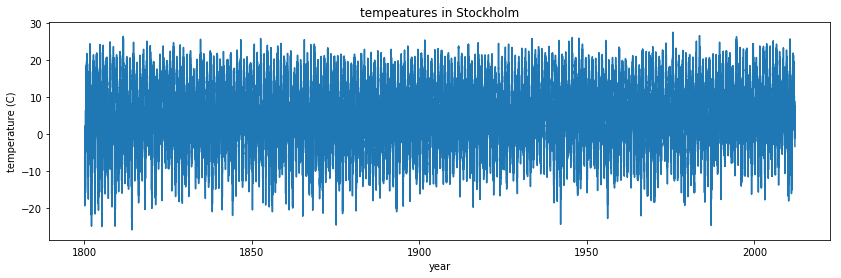

In [142]:
#visualize the data
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays.

For example, let's calculate some properties from the Stockholm temperature dataset used above.

### mean

In [143]:
# the temperature data is in column 3
np.mean(data[:,3])

6.1971096847515854

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

### standard deviations and variance

In [144]:
np.std(data[:,3]), np.var(data[:,3])

(8.2822716213405734, 68.596023209663414)

### min and max

In [145]:
# lowest daily average temperature
np.min(data[:,3])

-25.800000000000001

In [146]:
# highest daily average temperature
np.max(data[:,3])

28.300000000000001

## Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, let's go back to the temperature dataset:

In [147]:
!head -n 3 'stockholm_td_adj.dat'

'head' is not recognized as an internal or external command,
operable program or batch file.


The dataformat is: year, month, day, daily average temperature, low, high, location.

If we are interested in the average temperature only in a particular month, say April, then we can create a index mask and use it to select only the data for that month using:

In [148]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [149]:
mask_april = data[:,1] == 4
print(mask_april)

[False False False ..., False False False]


In [150]:
# the temperature data is in column 3
np.mean(data[mask_april,3])

3.888474842767295

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code:

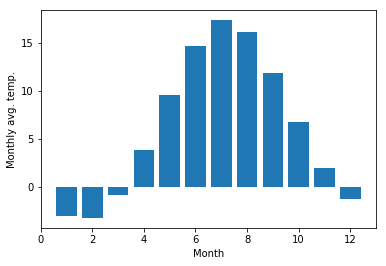

In [151]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months] 
# the power of list comprehension!

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

## Specifying the axis on higher-dimensional data

When functions such as min, max, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the axis argument we can specify how these functions should behave:

In [152]:
m = np.random.rand(3,3)
m

array([[ 0.69224812,  0.29624227,  0.5922417 ],
       [ 0.20409056,  0.35707035,  0.30116016],
       [ 0.37145538,  0.65066763,  0.81762578]])

In [153]:
# global max
m.max()

0.81762578028128108

In [154]:
# max in each column
m.max(axis=0)

array([ 0.69224812,  0.65066763,  0.81762578])

In [155]:
# max in each row
m.max(axis=1)

array([ 0.69224812,  0.35707035,  0.81762578])

### Some other things to try (more advanced level)
(from Python Data Science Handbook)

In [156]:
from scipy import special
# Gamma functions (generalized factorials) and related functions

x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [  1.00000000e+00   2.40000000e+01   3.62880000e+05]
ln|gamma(x)| = [  0.           3.17805383  12.80182748]
beta(x, 2)   = [ 0.5         0.03333333  0.00909091]


In [157]:
# Error function (integral of Gaussian)
# its complement, and its inverse

x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [ 0.          0.32862676  0.67780119  0.84270079]
erfc(x) = [ 1.          0.67137324  0.32219881  0.15729921]
erfinv(x) = [ 0.          0.27246271  0.73286908         inf]


In [158]:
# 'out' terminology (which skips the stepp of assigning it to a temporary array)
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)


[  0.  10.  20.  30.  40.]


In [159]:
x = np.arange(1, 6)
print(np.add.reduce(x))
print(np.multiply.reduce(x))
print(np.add.accumulate(x))
print(np.multiply.accumulate(x))

15
120
[ 1  3  6 10 15]
[  1   2   6  24 120]


In [160]:
# Outer Products
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [161]:
# operations across axes 
M = np.random.random((3, 4))
print(M)
# Axis here refers to the axis that will be collapsed!
print(M.min(axis = 0))
print(M.min(axis = 1))

[[ 0.6370813   0.10199893  0.5022388   0.22455211]
 [ 0.34991249  0.28514591  0.43742475  0.28639385]
 [ 0.3045601   0.16220075  0.47112362  0.58036233]]
[ 0.3045601   0.10199893  0.43742475  0.22455211]
[ 0.10199893  0.28514591  0.16220075]


### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a [``NaN``](https://en.wikipedia.org/wiki/NaN)-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

Source: Python Data Science Handbook

# Resources:  
- [Numpy Quickstart Guide](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
- [Official Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
- [Rahul Dave's CS109 lab1 content at Harvard](https://github.com/cs109/2015lab1)  
- [The Data Incubator](https://www.thedataincubator.com)  
- [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)